In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_treinamento = pd.read_csv('../arquivos_csv/treinamento2.csv', low_memory=False)
df_teste =       pd.read_csv('../arquivos_csv/teste2.csv', low_memory=False)


In [2]:
df_treinamento['Type_of_Loan'] = df_treinamento['Type_of_Loan'].str.replace(r'\band ', '', regex=True)
df_treinamento['Type_of_Loan'] = df_teste['Type_of_Loan'].str.replace(r'\band ', '', regex=True)

unique_values = df_treinamento['Type_of_Loan'].unique()
print(f"Valores únicos no atributo '{'Type_of_Loan'}':")
print(unique_values)

Valores únicos no atributo 'Type_of_Loan':
['Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Not Specified' ...
 'Debt Consolidation Loan, Home Equity Loan, Not Specified, Payday Loan, Personal Loan, Credit-Builder Loan'
 'Home Equity Loan, Personal Loan, Student Loan, Personal Loan'
 'Auto Loan, Mortgage Loan, Not Specified, Payday Loan, Student Loan']


In [3]:
# Criando um conjunto para armazenar as frases únicas
unique_phrases = set()

# Dividindo as frases por vírgula e adicionando ao conjunto, ignorando valores nulos
df_treinamento['Type_of_Loan'].dropna().str.split(',').apply(lambda x: unique_phrases.update([item.strip() for item in x]))

# Exibindo as frases únicas encontradas
unique_phrases = sorted(unique_phrases)
print(unique_phrases)


['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']


In [4]:
df_treinamento['Type_of_Loan'] = df_treinamento['Type_of_Loan'].fillna('Not Specified')

# Lista de tipos de empréstimo únicos
unique_phrases = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 
                  'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 
                  'Payday Loan', 'Personal Loan', 'Student Loan']

# Substituindo valores nulos em 'Type_of_Loan' por "Not Specified"
df_treinamento['Type_of_Loan'] = df_treinamento['Type_of_Loan'].fillna('Not Specified')

# Criando uma nova coluna binária para cada tipo de empréstimo
for phrase in unique_phrases:
    column_name = phrase.replace(' ', '_')  # Substituindo espaços por underscores para o nome da coluna
    df_treinamento[column_name] = df_treinamento['Type_of_Loan'].apply(lambda x: 1 if phrase in x else 0)

null_values = df_treinamento.isnull().sum()
null_values = null_values[null_values > 0]  # Filtra apenas colunas com valores nulos

# Exibindo colunas com valores nulos, se houver
print(null_values)

# Exibindo o DataFrame resultante
# df_treinamento.head()


Age                         7628
Annual_Income                999
Num_of_Loan                 3876
Num_of_Delayed_Payment      7044
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                 20195
Credit_History_Age          9030
Payment_of_Min_Amount      12007
Amount_invested_monthly     4479
Payment_Behaviour           7600
Monthly_Balance             1200
dtype: int64


In [5]:
df_teste['Type_of_Loan'] = df_teste['Type_of_Loan'].fillna('Not Specified')

# Lista de tipos de empréstimo únicos
unique_phrases = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 
                  'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 
                  'Payday Loan', 'Personal Loan', 'Student Loan']

# Criando uma nova coluna binária para cada tipo de empréstimo
for phrase in unique_phrases:
    column_name = phrase.replace(' ', '_')  # Substituindo espaços por underscores para o nome da coluna
    df_teste[column_name] = df_teste['Type_of_Loan'].apply(lambda x: 1 if phrase in x else 0)


#### Correlação

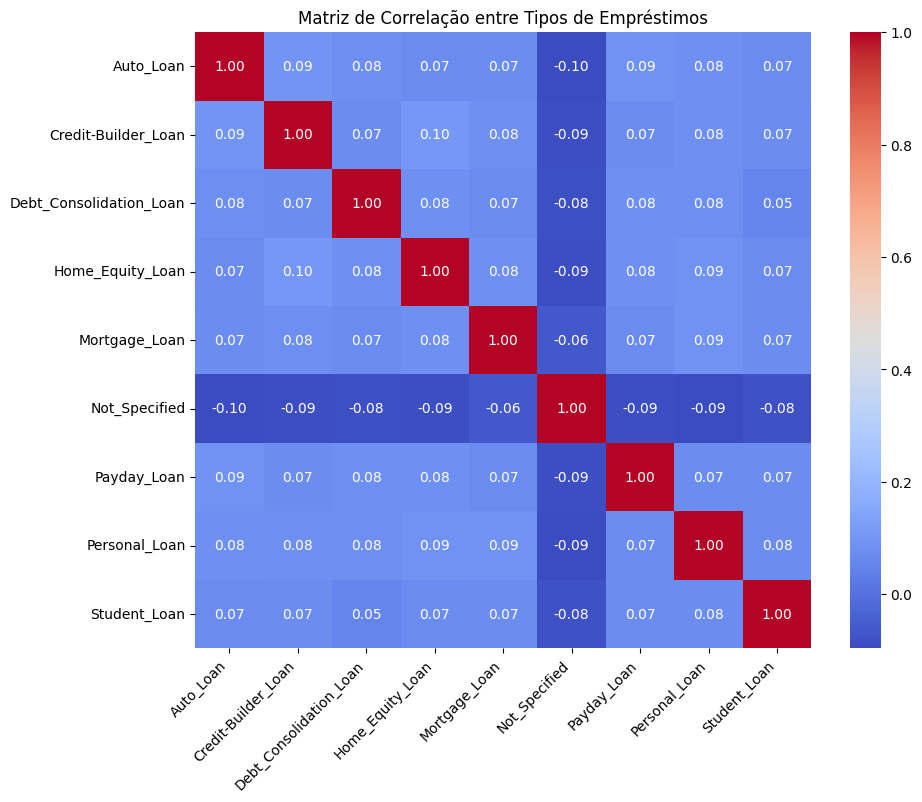

In [6]:
unique_phrases = ['Auto_Loan', 'Credit-Builder_Loan', 'Debt_Consolidation_Loan', 
                  'Home_Equity_Loan', 'Mortgage_Loan', 'Not_Specified', 
                  'Payday_Loan', 'Personal_Loan', 'Student_Loan']

correlation_matrix = df_treinamento[unique_phrases].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Matriz de Correlação entre Tipos de Empréstimos')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


### Remoção do atributo Type_of_Loan

In [7]:
df_treinamento = df_treinamento.drop(columns=['Type_of_Loan'])
df_teste = df_teste.drop(columns=['Type_of_Loan'])
df_teste = df_teste.drop(columns=['Credit_Score'])

# Salvando os Dados

In [8]:
df_treinamento.to_csv('../arquivos_csv/treinamento3.csv', index=False)
df_teste.to_csv('../arquivos_csv/teste3.csv', index=False)